In [1]:
#test the randoms made with anand's files
#cut to different chunks as needed
mask_dir  = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/'
ipynb_data_dir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/eboss_data/'

# Footprint

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'dec')

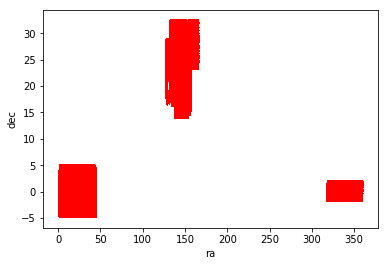

In [5]:
#data
%pylab inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import subprocess
real_obiwan_dat = fits.open(ipynb_data_dir+'eBOSS_ELG_full_ALL_v1_1.dat.fits')[1].data
#chunk21
plt.plot(real_obiwan_dat['ra'],real_obiwan_dat['dec'],'r,')
plt.gca().set_xlabel('ra')
plt.gca().set_ylabel('dec')

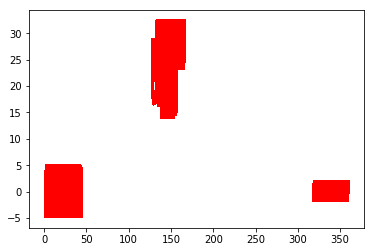

In [6]:
#randoms
obiwan_dat = fits.open(ipynb_data_dir+'eBOSS_ELG_full_ALL_v1_1.ran.fits')[1].data
plt.plot(obiwan_dat['ra'],obiwan_dat['dec'],'r,')

# Mask
#### these masks need to be applied after legacypipe code

In [7]:
#mask function defined to mask eboss ELGs:
import pymangle
def mask(inl,maskl,md='veto',upper = False):
        '''
        input: inl--data, mask--file names of the mask list
        output: list of True/False for whether a point should be masked
        '''
        if upper:
            RA = 'RA'
            DEC = 'DEC'
        else:
            RA = 'ra'
            DEC = 'dec'

        if md == 'foot':
                keep = np.zeros(inl.size,dtype='bool')  #object is outside of footprint unless it is found
        if md == 'veto':
                keep = np.ones(inl.size,dtype='bool')   #object is outside of veto mask unless it is found

        for mask in maskl:
                mng = pymangle.Mangle(mask)
                polyid = mng.polyid(inl[RA],inl[DEC])
                if md == 'foot':
                        keep[polyid!=-1] = True #keep the object if a polyid is found
                if md == 'veto':
                        keep[polyid!=-1] = False #do not keep the object if a polyid is found   
                print(mask+' done')
        return keep
    
def init_eboss_mask():
        '''
        generate a list of fileanmes for vetomask and footprint mask
        returns:
        veto mask list, footprint mask list
        '''
        maskdir = mask_dir 
        veto_mask = []
        veto_mask.append(maskdir+'bright_object_mask_rykoff_pix.ply')
        veto_mask.append(maskdir+'tycho2mask-0Vmag10.pol')
        veto_mask.append(maskdir+'tycho2mask-10Vmag11.pol')
        veto_mask.append(maskdir+'tycho2mask-11Vmag115.pol')
        veto_mask.append(maskdir+'ELG_centerpost.ply')
        footprint_mask = []
        footprint_mask.append(maskdir+'geometry-eboss21.ply')
        footprint_mask.append(maskdir+'geometry-eboss22.ply')
        return veto_mask,footprint_mask
    
def init_eboss_mask_chunk21():
        '''
        generate a list of fileanmes for vetomask and footprint mask
        returns:
        veto mask list, footprint mask list
        '''
        maskdir = mask_dir 
        veto_mask = []
        veto_mask.append(maskdir+'bright_object_mask_rykoff_pix.ply')
        veto_mask.append(maskdir+'tycho2mask-0Vmag10.pol')
        veto_mask.append(maskdir+'tycho2mask-10Vmag11.pol')
        veto_mask.append(maskdir+'tycho2mask-11Vmag115.pol')
        veto_mask.append(maskdir+'ELG_centerpost.ply')
        footprint_mask = []
        footprint_mask.append(maskdir+'geometry-eboss21.ply')
        return veto_mask,footprint_mask    

def init_eboss_mask_chunk22():
        '''
        generate a list of fileanmes for vetomask and footprint mask
        returns:
        veto mask list, footprint mask list
        '''
        maskdir = mask_dir 
        veto_mask = []
        veto_mask.append(maskdir+'bright_object_mask_rykoff_pix.ply')
        veto_mask.append(maskdir+'tycho2mask-0Vmag10.pol')
        veto_mask.append(maskdir+'tycho2mask-10Vmag11.pol')
        veto_mask.append(maskdir+'tycho2mask-11Vmag115.pol')
        veto_mask.append(maskdir+'ELG_centerpost.ply')
        footprint_mask = []
        footprint_mask.append(maskdir+'geometry-eboss22.ply')
        return veto_mask,footprint_mask 
    
veto_mask_chunk21,foot_mask_chunk21 = init_eboss_mask_chunk21()
veto_mask_chunk22,foot_mask_chunk22 = init_eboss_mask_chunk22()

In [11]:
#chunk21, random
veto_list = mask(obiwan_dat,veto_mask_chunk21,md='veto')
foot_list = mask(obiwan_dat,foot_mask_chunk21,md='foot')

col_dat_vetol = fits.Column(name='veto_mask', format='B', array = veto_list)
col_dat_footl = fits.Column(name='foot_mask', format='B', array = foot_list)
col_dat_orig = fits.ColDefs(np.array(obiwan_dat))
col_dat_mask = col_dat_orig.add_col(col_dat_vetol).add_col(col_dat_footl)
dat_temp = fits.BinTableHDU.from_columns(col_dat_mask).writeto('./temp.fits',overwrite = True)
dat_masked = fits.open('./temp.fits')[1].data
subprocess.call(["rm","temp.fits"])
mask1 = dat_masked['veto_mask']
mask2 = dat_masked['foot_mask']
mask_sel = (mask1==True) & (mask2==True)
dat_final_sim_chunk21 = np.array(dat_masked[mask_sel])

#masks are small compared to the map scale

/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/bright_object_mask_rykoff_pix.ply done
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/tycho2mask-0Vmag10.pol done
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/tycho2mask-10Vmag11.pol done
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/tycho2mask-11Vmag115.pol done
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/ELG_centerpost.ply done
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/geometry-eboss21.ply done


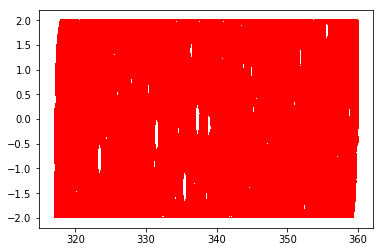

In [12]:
plt.plot(dat_final_sim_chunk21['RA'],dat_final_sim_chunk21['DEC'],'r,')

/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/bright_object_mask_rykoff_pix.ply done
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/tycho2mask-0Vmag10.pol done
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/tycho2mask-10Vmag11.pol done
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/tycho2mask-11Vmag115.pol done
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/ELG_centerpost.ply done
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/geometry-eboss22.ply done


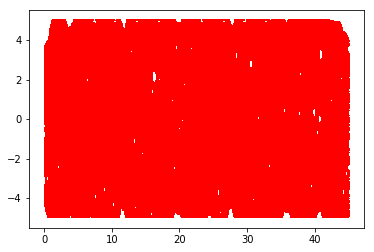

In [20]:
#chunk22, random
veto_list = mask(obiwan_dat,veto_mask_chunk22,md='veto')
foot_list = mask(obiwan_dat,foot_mask_chunk22,md='foot')

col_dat_vetol = fits.Column(name='veto_mask', format='B', array = veto_list)
col_dat_footl = fits.Column(name='foot_mask', format='B', array = foot_list)
col_dat_orig = fits.ColDefs(np.array(obiwan_dat))
col_dat_mask = col_dat_orig.add_col(col_dat_vetol).add_col(col_dat_footl)
dat_temp = fits.BinTableHDU.from_columns(col_dat_mask).writeto('./temp.fits',overwrite = True)
dat_masked = fits.open('./temp.fits')[1].data
subprocess.call(["rm","temp.fits"])
mask1 = dat_masked['veto_mask']
mask2 = dat_masked['foot_mask']
mask_sel = (mask1==True) & (mask2==True)
dat_final_sim_chunk22 = np.array(dat_masked[mask_sel])

#masks are small compared to the map scale
plt.plot(dat_final_sim_chunk22['RA'],dat_final_sim_chunk22['DEC'],'r,')

/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/bright_object_mask_rykoff_pix.ply done
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/tycho2mask-0Vmag10.pol done
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/tycho2mask-10Vmag11.pol done
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/tycho2mask-11Vmag115.pol done
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/ELG_centerpost.ply done
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/geometry-eboss21.ply done


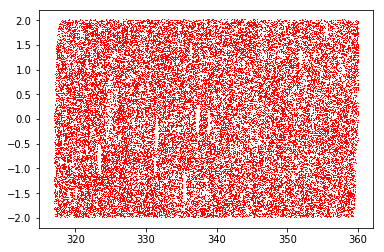

In [15]:
#data, chunk21
veto_list = mask(real_obiwan_dat,veto_mask_chunk21,md='veto')
foot_list = mask(real_obiwan_dat,foot_mask_chunk21,md='foot')

col_dat_vetol = fits.Column(name='veto_mask', format='B', array = veto_list)
col_dat_footl = fits.Column(name='foot_mask', format='B', array = foot_list)
col_dat_orig = fits.ColDefs(np.array(real_obiwan_dat))
col_dat_mask = col_dat_orig.add_col(col_dat_vetol).add_col(col_dat_footl)
dat_temp = fits.BinTableHDU.from_columns(col_dat_mask).writeto('./temp.fits',overwrite = True)
dat_masked = fits.open('./temp.fits')[1].data
subprocess.call(["rm","temp.fits"])
mask1 = dat_masked['veto_mask']
mask2 = dat_masked['foot_mask']
mask_sel = (mask1==True) & (mask2==True)
dat_final_obiwan_chunk21 = np.array(dat_masked[mask_sel])

plt.plot(dat_final_obiwan_chunk21['RA'],dat_final_obiwan_chunk21['DEC'],'r,')

/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/bright_object_mask_rykoff_pix.ply done
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/tycho2mask-0Vmag10.pol done
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/tycho2mask-10Vmag11.pol done
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/tycho2mask-11Vmag115.pol done
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/ELG_centerpost.ply done
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/geometry-eboss22.ply done


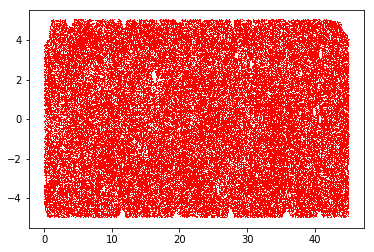

In [18]:
#data, chunk22
veto_list = mask(real_obiwan_dat,veto_mask_chunk22,md='veto')
foot_list = mask(real_obiwan_dat,foot_mask_chunk22,md='foot')

col_dat_vetol = fits.Column(name='veto_mask', format='B', array = veto_list)
col_dat_footl = fits.Column(name='foot_mask', format='B', array = foot_list)
col_dat_orig = fits.ColDefs(np.array(real_obiwan_dat))
col_dat_mask = col_dat_orig.add_col(col_dat_vetol).add_col(col_dat_footl)
dat_temp = fits.BinTableHDU.from_columns(col_dat_mask).writeto('./temp.fits',overwrite = True)
dat_masked = fits.open('./temp.fits')[1].data
subprocess.call(["rm","temp.fits"])
mask1 = dat_masked['veto_mask']
mask2 = dat_masked['foot_mask']
mask_sel = (mask1==True) & (mask2==True)
dat_final_obiwan_chunk22 = np.array(dat_masked[mask_sel])

plt.plot(dat_final_obiwan_chunk22['RA'],dat_final_obiwan_chunk22['DEC'],'r,')

In [21]:
random_chunk21 = fits.ColDefs(dat_final_sim_chunk21)
t1 = fits.BinTableHDU.from_columns(random_chunk21)
t1.writeto(ipynb_data_dir+'eBOSS_ELG_full_ALL_v1_1.ran_chunk21.fits',overwrite=True)

random_chunk22 = fits.ColDefs(dat_final_sim_chunk22)
t2 = fits.BinTableHDU.from_columns(random_chunk22)
t2.writeto(ipynb_data_dir+'eBOSS_ELG_full_ALL_v1_1.ran_chunk22.fits',overwrite=True)


data_chunk21 = fits.ColDefs(dat_final_obiwan_chunk21)
t3 = fits.BinTableHDU.from_columns(data_chunk21)
t3.writeto(ipynb_data_dir+'eBOSS_ELG_full_ALL_v1_1.dat_chunk21.fits',overwrite=True)

data_chunk22 = fits.ColDefs(dat_final_obiwan_chunk22)
t4 = fits.BinTableHDU.from_columns(data_chunk22)
t4.writeto(ipynb_data_dir+'eBOSS_ELG_full_ALL_v1_1.dat_chunk22.fits',overwrite=True)

## TODO:some systematics test:


In [4]:
#survey ccds:
ccds_dir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ebosselg_ccds/'
fits_file = 'survey-ccds-ebossDR3.fits'
import astropy.io.fits as fits
dat = fits.open(ccds_dir+fits_file)[1].data

In [5]:
!ls /global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ebosselg_ccds/

ebosselg_ccds.dr3.log		ebosselg_ccds.dr5-eboss2.log
ebosselg_ccds.dr3.tar		ebosselg_ccds.dr5-eboss2.tar
ebosselg_ccds.dr3_utah_ngc.log	survey-ccds-dr3.fits.gz
ebosselg_ccds.dr3_utah_ngc.tar	survey-ccds-dr3_utah_ngc.fits.gz
ebosselg_ccds.dr3_utah_sgc.log	survey-ccds-dr3_utah_sgc.fits
ebosselg_ccds.dr3_utah_sgc.tar	survey-ccds-dr5-eboss.fits.gz
ebosselg_ccds.dr5-eboss.log	survey-ccds-dr5-eboss2.fits.gz
ebosselg_ccds.dr5-eboss.tar	survey-ccds-ebossDR3.fits


In [6]:
!ls /global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ebosselg_ccds/

ebosselg_ccds.dr3.log		ebosselg_ccds.dr5-eboss2.log
ebosselg_ccds.dr3.tar		ebosselg_ccds.dr5-eboss2.tar
ebosselg_ccds.dr3_utah_ngc.log	survey-ccds-dr3.fits.gz
ebosselg_ccds.dr3_utah_ngc.tar	survey-ccds-dr3_utah_ngc.fits.gz
ebosselg_ccds.dr3_utah_sgc.log	survey-ccds-dr3_utah_sgc.fits
ebosselg_ccds.dr3_utah_sgc.tar	survey-ccds-dr5-eboss.fits.gz
ebosselg_ccds.dr5-eboss.log	survey-ccds-dr5-eboss2.fits.gz
ebosselg_ccds.dr5-eboss.tar	survey-ccds-ebossDR3.fits


Populating the interactive namespace from numpy and matplotlib
390035


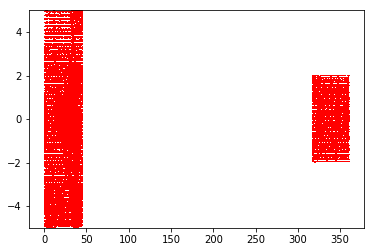

In [7]:
%pylab inline
import matplotlib.pyplot as plt
plt.plot(dat['ra'],dat['dec'],'r,')
#plt.gca().set_xlim((0,50))
plt.gca().set_ylim((-5,5))
print(len(dat))

390035
226008


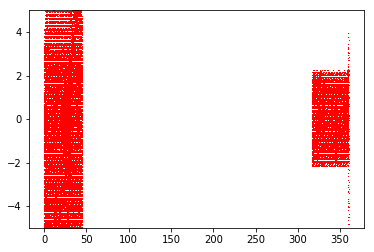

In [8]:
import astropy.io.fits as fits
fn1 = 'survey-ccds-dr3_utah_ngc.fits.gz'
fn2 = 'survey-ccds-dr3_utah_sgc.fits'
fn3 = 'survey-ccds-dr3.fits.gz'
fn4 = 'survey-ccds-ebossDR3.fits'
dat1 = fits.open(ccds_dir+fn1)[1].data
dat2 = fits.open(ccds_dir+fn2)[1].data
dat3 = fits.open(ccds_dir+fn3)[1].data
dat4 = fits.open(ccds_dir+fn4)[1].data
plt.plot(dat3['ra'],dat3['dec'],'r,')
plt.plot(dat2['ra'],dat2['dec'],'r,')
plt.plot(dat1['ra'],dat1['dec'],'r,')
#plt.gca().set_xlim((0,50))
plt.gca().set_ylim((-5,5))
print(len(dat4))
print(len(dat1)+len(dat2)+len(dat3))

(-5, 5)

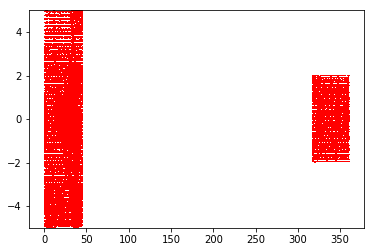

In [9]:
plt.plot(dat4['ra'],dat4['dec'],'r,')
plt.gca().set_ylim((-5,5))

# ccd list

In [35]:
dat1.columns

ColDefs(
    name = 'object'; format = '35A'
    name = 'expnum'; format = 'J'
    name = 'exptime'; format = 'E'
    name = 'filter'; format = '1A'
    name = 'seeing'; format = 'E'
    name = 'date_obs'; format = '10A'
    name = 'mjd_obs'; format = 'D'
    name = 'ut'; format = '15A'
    name = 'ha'; format = '13A'
    name = 'airmass'; format = 'E'
    name = 'propid'; format = '10A'
    name = 'zpt'; format = 'E'
    name = 'avsky'; format = 'E'
    name = 'arawgain'; format = 'E'
    name = 'fwhm'; format = 'E'
    name = 'crpix1'; format = 'E'
    name = 'crpix2'; format = 'E'
    name = 'crval1'; format = 'D'
    name = 'crval2'; format = 'D'
    name = 'cd1_1'; format = 'E'
    name = 'cd1_2'; format = 'E'
    name = 'cd2_1'; format = 'E'
    name = 'cd2_2'; format = 'E'
    name = 'ccdnum'; format = 'I'
    name = 'ccdname'; format = '3A'
    name = 'ccdzpt'; format = 'E'
    name = 'ccdzpta'; format = 'E'
    name = 'ccdzptb'; format = 'E'
    name = 'ccdphoff'; format = 'E'

In [34]:
dat3.columns

ColDefs(
    name = 'object'; format = '37A'
    name = 'expnum'; format = 'J'
    name = 'exptime'; format = 'E'
    name = 'filter'; format = '1A'
    name = 'seeing'; format = 'E'
    name = 'date_obs'; format = '10A'
    name = 'mjd_obs'; format = 'D'
    name = 'ut'; format = '15A'
    name = 'ha'; format = '13A'
    name = 'airmass'; format = 'E'
    name = 'propid'; format = '10A'
    name = 'zpt'; format = 'E'
    name = 'avsky'; format = 'E'
    name = 'arawgain'; format = 'E'
    name = 'fwhm'; format = 'E'
    name = 'crpix1'; format = 'E'
    name = 'crpix2'; format = 'E'
    name = 'crval1'; format = 'D'
    name = 'crval2'; format = 'D'
    name = 'cd1_1'; format = 'E'
    name = 'cd1_2'; format = 'E'
    name = 'cd2_1'; format = 'E'
    name = 'cd2_2'; format = 'E'
    name = 'ccdnum'; format = 'I'
    name = 'ccdname'; format = '3A'
    name = 'ccdzpt'; format = 'E'
    name = 'ccdzpta'; format = 'E'
    name = 'ccdzptb'; format = 'E'
    name = 'ccdphoff'; format = 'E'

In [10]:
'''
dat1:
expnum: name = 'expnum'; format = 'J'
ccdname: name = 'ccdname'; format = '3A'
ra: name = 'ra'; format = 'D'
dec: name = 'dec'; format = 'D'

dat2:
expnum: name = 'expnum'; format = 'K'
ccdname: name = 'ccdname'; format = '4A'
ra: name = 'ra'; format = 'D'
dec: name = 'dec'; format = 'D'

dat3:
name = 'expnum'; format = 'J'
name = 'ccdname'; format = '3A'
ra: name = 'ra'; format = 'D'
dec: name = 'dec'; format = 'D'
'''
a1 = fits.Column(name='ccdname', array=dat1['ccdname'], format='3A')
a2 = fits.Column(name='ccdname', array=dat2['ccdname'], format='3A')
a3 = fits.Column(name='ccdname', array=dat3['ccdname'], format='3A')
a4 = fits.Column(name='ccdname', array=dat4['ccdname'], format='3A')

b1 = fits.Column(name='ra', array=dat1['ra'], format='D')
b2 = fits.Column(name='ra', array=dat2['ra'], format='D')
b3 = fits.Column(name='ra', array=dat3['ra'], format='D')
b4 = fits.Column(name='ra', array=dat4['ra'], format='D')

c1 = fits.Column(name='expnum', array=dat1['expnum'], format='J')
c2 = fits.Column(name='expnum', array=dat2['expnum'], format='J')
c3 = fits.Column(name='expnum', array=dat3['expnum'], format='J')
c4 = fits.Column(name='expnum', array=dat4['expnum'], format='J')

d1 = fits.Column(name='dec', array=dat1['dec'], format='D')
d2 = fits.Column(name='dec', array=dat2['dec'], format='D')
d3 = fits.Column(name='dec', array=dat3['dec'], format='D')
d4 = fits.Column(name='dec', array=dat4['dec'], format='D')

t1 = fits.BinTableHDU.from_columns([a1, b1, c1, d1]).data
t2 = fits.BinTableHDU.from_columns([a2, b2, c2, d2]).data
t3 = fits.BinTableHDU.from_columns([a3, b3, c3, d3]).data
t4 = fits.BinTableHDU.from_columns([a4, b4, c4, d4]).data

In [11]:
import numpy as np
t1 = np.hstack((t1,t2))
t1 = np.hstack((t1,t3))

In [12]:
# removing duplicates
import numpy as np
uniqid      = np.array([str(e)+'-'+n for e,n in zip(t1['expnum'],t1['ccdname'])])
keep        = np.unique(uniqid,return_index=True)[1]
t1 = t1[keep]

In [13]:
len(t1)

213633

(-5, 5)

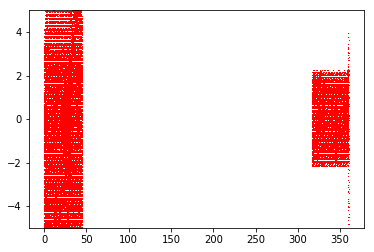

In [19]:
plt.plot(t1['ra'],t1['dec'],'r,')
plt.gca().set_ylim((-5,5))

## Generate a new ccd list file with no duplicates
I finally made a file called survey-ccds-dr3-hui.fits in:
/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ebosselg_ccds/

In [14]:
import astropy.io.fits as fits
ccds_dir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ebosselg_ccds/'
fn1 = 'survey-ccds-dr3_utah_ngc.fits.gz'
fn2 = 'survey-ccds-dr3_utah_sgc.fits'
fn3 = 'survey-ccds-dr3.fits.gz'
fn4 = 'survey-ccds-ebossDR3.fits'
dat1 = fits.open(ccds_dir+fn1)[1].data
dat2 = fits.open(ccds_dir+fn2)[1].data
dat3 = fits.open(ccds_dir+fn3)[1].data
dat4 = fits.open(ccds_dir+fn4)[1].data

#dat2 data format is different from dat 1,3,4
#column name pid does not exist, hope it's ok...
for i in range(len(dat4.columns)):
    name = dat4.columns[i].name
    found = False
    for j in range(len(dat2.columns)):
        if dat2.columns[j].name == dat4.columns[i].name:
            found = True
            break
    if found == False:
        print name

pid


In [19]:
for i in range(len(dat1.columns)):
    name = dat1.columns[i].name
    found = False
    for j in range(len(dat2.columns)):
        if dat2.columns[j].name == dat1.columns[i].name:
            found = True
            break
    if found == False:
        print name
#column names of dat1,2,3 are the same, format are different, I will 
#make format become the same to stack them

In [18]:
#dat1 has different format with dat2,dat3
for i in range(len(dat1.columns)):
    name = dat1.columns[i].name
    index = None
    for j in range(len(dat3.columns)):
        if dat3.columns[j].name == dat1.columns[i].name:
            index = j
            break
    #if dat3.columns[j].format != dat1.columns[i].format:
        #print(dat1.columns[i].name,dat1.columns[i].format,dat3.columns[j].format,dat3.columns[j].name)

In [33]:
##ABANDONED!!
#creat new fits file for dat2, dat3 with the same format as dat1
cols1 = []
cols2 = []
cols3 = []
#match 2 with 1
for i in range(len(dat1.columns)):
    name = dat1.columns[i].name
    index = None
    for j in range(len(dat2.columns)):
        if dat2.columns[j].name == dat1.columns[i].name:
            index = j
            break
    d_name = dat2.columns[index].name
    d_format = dat1.columns[i].format
    d_format2 = dat2.columns[index].format
    d_array = dat2[d_name]
    #print(d_name, d_format,d_format2)
    if d_name == 'ccdnum':
        d_array = [int(i) for i in d_array]
    col = fits.Column(name=d_name, array=d_array, format=d_format)
    cols2.append(col)
ccd_2 = fits.BinTableHDU.from_columns(cols2)

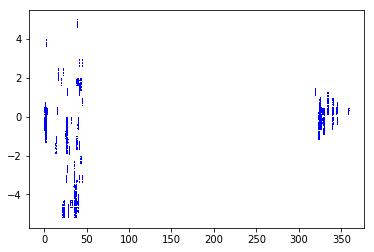

In [41]:
#make sure these two matches
plt.plot(ccd_2.data['ra'],ccd_2.data['dec'],'r,')
plt.plot(dat2['ra'],dat2['dec'],'b,')

In [45]:
##ABANDONED!!
#match 3 with 1
cols3 = []
for i in range(len(dat1.columns)):
    name = dat1.columns[i].name
    index = None
    for j in range(len(dat3.columns)):
        if dat3.columns[j].name == dat1.columns[i].name:
            index = j
            break
    d_name = dat3.columns[index].name
    d_format = dat1.columns[i].format
    d_format2 = dat3.columns[index].format
    d_array = dat3[d_name]
    #print(d_name, d_format,d_format2)
    #if d_name == 'ccdnum':
        #d_array = [int(i) for i in d_array]
    col = fits.Column(name=d_name, array=d_array, format=d_format)
    cols3.append(col)

In [109]:
#We need to set the string length to be longest

cols1 = []
cols2 = []
cols3 = []
#match 2 with 1
for i in range(len(dat1.columns)):
    name = dat1.columns[i].name
    index = None
    for j in range(len(dat2.columns)):
        if dat2.columns[j].name == dat1.columns[i].name:
            index = j
            break
    index3 = None
    for k in range(len(dat3.columns)):
        if dat3.columns[k].name == dat1.columns[i].name:
            index3 = k
            break
    d_name = dat1.columns[i].name
    d_format1 = dat1.columns[i].format
    d_format2 = dat2.columns[index].format
    d_format3 = dat3.columns[index3].format
    d_array1 = dat1[d_name]
    d_array2 = dat2[d_name]
    d_array3 = dat3[d_name]
    
    if 'A' in d_format1:
        num1 = int(d_format1.replace('A',''))
        num2 = int(d_format2.replace('A',''))
        num3 = int(d_format3.replace('A',''))
        num = max(num1,num2,num3)
        d_format = str(num)+'A'
    else:
        d_format = d_format1
    if d_name == 'ccdnum':
        d_array2 = [int(i) for i in d_array2]
        d_array3 = [int(i) for i in d_array3]
    #print(d_name, d_format1, d_format2, d_format3,d_format)
    col1 = fits.Column(name=d_name, array=d_array1, format=d_format)
    cols1.append(col1)
    col2 = fits.Column(name=d_name, array=d_array2, format=d_format)
    cols2.append(col2)
    col3 = fits.Column(name=d_name, array=d_array3, format=d_format)
    cols3.append(col3)

In [110]:
ccd_1 = fits.BinTableHDU.from_columns(cols1)
ccd_2 = fits.BinTableHDU.from_columns(cols2)
ccd_3 = fits.BinTableHDU.from_columns(cols3)

In [111]:
import numpy as np
t = np.hstack((ccd_1.data,ccd_2.data))
t = np.hstack((t,ccd_3.data))

In [112]:
# removing duplicates
uniqid      = np.array([str(e)+'-'+n for e,n in zip(t['expnum'],t['ccdname'])])
keep        = np.unique(uniqid,return_index=True)[1]
t = t[keep]

In [113]:
len(t)

213633

In [114]:
tot_col = fits.ColDefs(t)
tot_t = fits.BinTableHDU.from_columns(tot_col)
tot_t.writeto(ccds_dir+'survey-ccds-dr3-hui.fits',overwrite = True)

In [68]:
!ls /global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ebosselg_ccds/

ebosselg_ccds.dr3.log		ebosselg_ccds.dr5-eboss2.tar
ebosselg_ccds.dr3.tar		survey-ccds-dr3-hui.fits
ebosselg_ccds.dr3_utah_ngc.log	survey-ccds-dr3.fits.gz
ebosselg_ccds.dr3_utah_ngc.tar	survey-ccds-dr3_utah_ngc.fits.gz
ebosselg_ccds.dr3_utah_sgc.log	survey-ccds-dr3_utah_sgc.fits
ebosselg_ccds.dr3_utah_sgc.tar	survey-ccds-dr5-eboss.fits.gz
ebosselg_ccds.dr5-eboss.log	survey-ccds-dr5-eboss2.fits.gz
ebosselg_ccds.dr5-eboss.tar	survey-ccds-ebossDR3.fits
ebosselg_ccds.dr5-eboss2.log


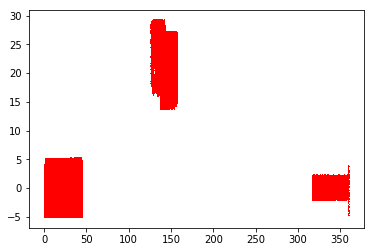

In [115]:
dat = fits.open('/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ebosselg_ccds/survey-ccds-dr3-hui.fits')[1].data
plt.plot(dat['ra'],dat['dec'],'r,')
#dat1.columns

6

## ra,dec distribution for varied ccds

In [152]:
t1_tup = tuple(zip(t1['expnum'],t1['ccdname']))
t4_tup = tuple(zip(t4['expnum'],t4['ccdname']))

In [159]:
print(len(set(t4_tup)-set(t1_tup)))
print(len(t4)-len(t1))
print(len(set(t1_tup)-set(t4_tup)))

180903
176402
7723


In [179]:
t4_extra = set(t4_tup)-set(t1_tup)
t1_extra = set(t1_tup)-set(t4_tup)
t4_extra = np.array(list(t4_extra)).transpose()
t1_extra = np.array(list(t1_extra)).transpose()

In [213]:
dat4_mask = np.zeros(len(dat4),dtype = bool)
t4_expnum = t4_extra[0].astype(int32)

In [214]:
for i in range(len(dat4)):
    if dat4['expnum'][i] in t4_expnum and dat4['ccdname'][i]\
    in t4_extra[1]:
        t4_mask[i] = True

In [225]:
count = 0
for i in range(len(t4_mask)):
    if t4_mask[i] == True:
        count+=1
print(count)

215575


In [228]:
dat4_extra = dat4[t4_mask]

(315, 360)

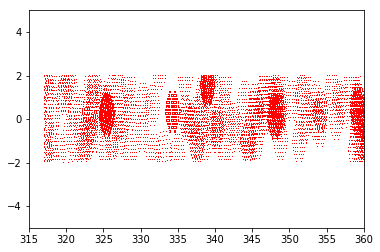

In [236]:
plt.plot(dat4_extra['ra'],dat4_extra['dec'],'r,')
plt.gca().set_ylim((-5,5))
plt.gca().set_xlim((315,360))
'''
this plot shows that the ccd difference bascially covers all footprint, 
which means I need to rerun the whole thing again...
'''

## This is brick 0356m040, this section shows the difference between Kaylan's ccd list and Anand's ccd list

In [11]:
'''
brick: 0356m040
ra: 35.39855640110362 -- 35.95489748394289
dec: -4.205247750254634 -- -3.807373257875968
2579 ccds in Kaylan's ccd list
70 ccds in Anand's ccd list
'''
RA = dat4['ra']
DEC = dat4['dec']
SEL = (RA>=35.39855640110362)&(RA<=35.95489748394289)&(DEC>=-4.205247750254634)&(DEC<=-3.807373257875968)

In [12]:
len(dat4[SEL])

2579

In [20]:
RA=t1['ra']
DEC=t1['dec']
SEL = (RA>=35.39855640110362)&(RA<=35.95489748394289)&(DEC>=-4.205247750254634)&(DEC<=-3.807373257875968)
print(len(t1[SEL]))

70


In [45]:
!pwd

/global/u2/h/huikong/obiwan_codes/obiwan_Aug/obiwan_code/py/obiwan/more/ipynb
